In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from typing import Dict, List, Any

def load_json(file_path: str) -> Dict[str, Any]:
    """
    Load JSON data from a file and return it as a dictionary.

    Parameters:
    file_path (str): The path to the JSON file.

    Returns:
    dict: The JSON data as a dictionary.
    """
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

def json_to_dataframe(data: Dict[str, Any], column_names: List[str] = ['ID', 'hom', 'het']) -> pd.DataFrame:
    """
    Convert a dictionary to a pandas DataFrame with specific columns.

    Parameters:
    data (dict): The input dictionary with nested dictionaries.
    column_names (List[str]): The list of column names for the DataFrame. Default to ['ID', 'hom', 'het'].

    Returns:
    pd.DataFrame: The resulting DataFrame with specified columns.
    """
    df = pd.DataFrame.from_dict(data, orient='index').reset_index()
    df.columns = column_names
    return df

In [2]:
def add_ratio_column(df: pd.DataFrame) -> pd.DataFrame:
    """
    Add a 'ratio_het_hom' column to the DataFrame, which is the value in 'het' 
    divided by the sum of 'hom' and 'het'.

    Parameters:
    df (pd.DataFrame): The input DataFrame with 'het' and 'hom' columns.

    Returns:
    pd.DataFrame: The DataFrame with the added 'ratio_het_hom' column.
    """
    df['ratio_het_hom'] = (df['het'] / (df['hom'] + df['het']))  
    return df

In [3]:
file_path = 'sample_homhet.json'

data = load_json(file_path)

df = json_to_dataframe(data)
del data
df = add_ratio_column(df)

print(df)

        ID    hom    het  ratio_het_hom
0     AAAA  39305    110       0.002791
1     AAAB  43897    776       0.017371
2     AAAC  37640  23592       0.385289
3     AAAD  57479    270       0.004675
4     AAAE  42491     73       0.001715
...    ...    ...    ...            ...
2325  VAAW  39145    127       0.003234
2326  VAAX  37169   7114       0.160649
2327  VAAY  38642   1700       0.042140
2328  VAAZ  27797  42411       0.604076
2329  VABA  35912   9578       0.210552

[2330 rows x 4 columns]


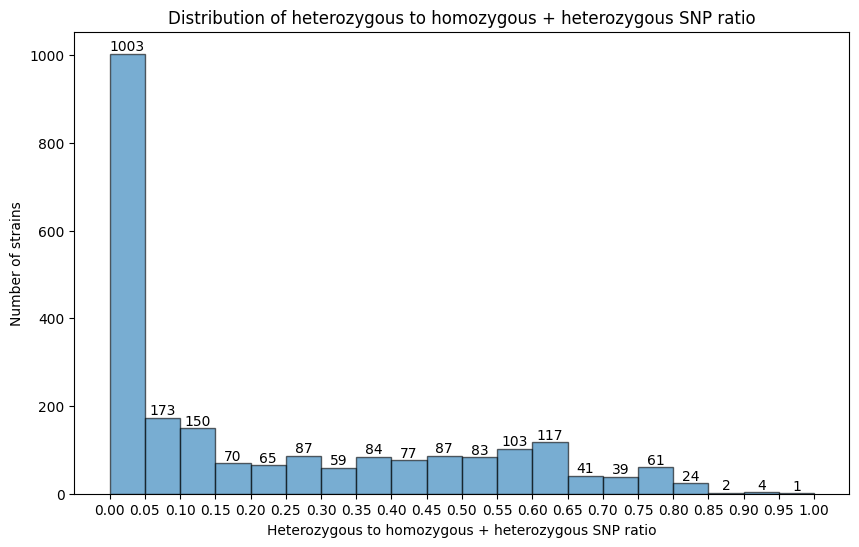

In [41]:
def plot_density_ratio(df: pd.DataFrame, column: str, bin_size: float, save_path: str = None, remove_first_bin: bool = False, show_counts: bool = False) -> None:
    """
    Plot density of a given column in a pandas DataFrame with specified bins.

    Parameters:
        df (pd.DataFrame): Input DataFrame.
        column (str): Name of the column to plot.
        bin_size (float): Size of each bin for histogram.
        save_path (str, optional): Path to save the plot image. Defaults to None.
        remove_first_bin (bool, optional): Flag to remove the first bin from the histogram. Defaults to False.
        show_counts (bool, optional): Flag to display counts on top of each bar. Defaults to False.

    Returns:
        None
    """
    # Define bins
    bins = np.arange(0, max(df[column]) + bin_size, bin_size)  # Ensure the max value is included
    
    if remove_first_bin:
        # Exclude the first bin
        bins = bins[1:]
        # Filter the data to exclude values in the first bin range
        df = df[df[column] >= bins[0]]
    
    # Plot histogram
    plt.figure(figsize=(10, 6))
    counts, bins, patches = plt.hist(df[column], bins=bins, alpha=0.6, edgecolor='black')

    # Set plot labels and title
    plt.xlabel('Heterozygous to homozygous + heterozygous SNP ratio')
    plt.ylabel('Number of strains')
    plt.title(f'Distribution of heterozygous to homozygous + heterozygous SNP ratio')
    plt.xticks(bins)
    
    # Optionally annotate counts on top of each bar
    if show_counts:
        for count, patch in zip(counts, patches):
            plt.text(patch.get_x() + patch.get_width() / 2, count, int(count), ha='center', va='bottom')
    
    # Save the plot if save_path is provided
    if save_path:
        plt.savefig(save_path)
        
    # Show plot
    plt.show()

    
plot_density_ratio(df, 'ratio_het_hom', bin_size=0.05, save_path='ratio.png', show_counts=True)

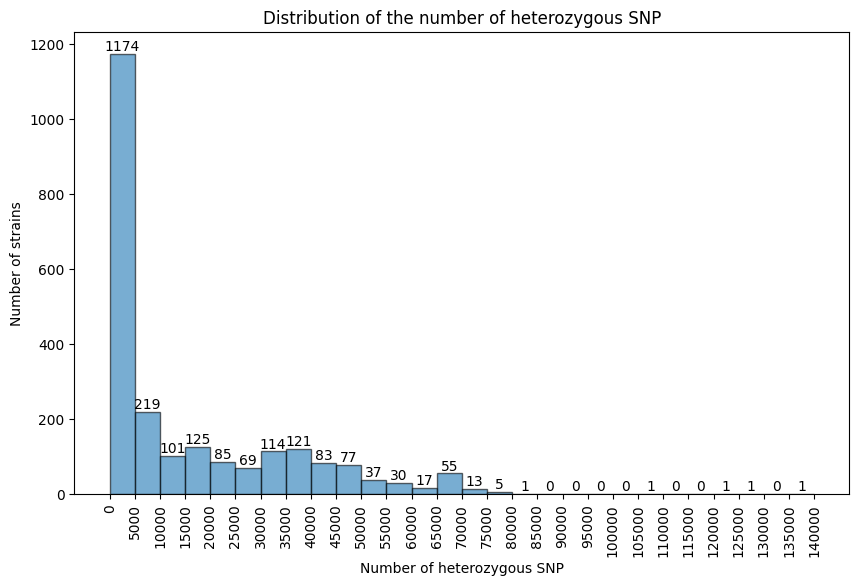

In [38]:
def plot_density_het(df: pd.DataFrame, column: str, bin_size: float, save_path: str = None, remove_first_bin: bool = False, show_counts: bool = False) -> None:
    """
    Plot density of a given column in a pandas DataFrame with specified bins.

    Parameters:
        df (pd.DataFrame): Input DataFrame.
        column (str): Name of the column to plot.
        bin_size (float): Size of each bin for histogram.
        save_path (str, optional): Path to save the plot image. Defaults to None.
        remove_first_bin (bool, optional): Flag to remove the first bin from the histogram. Defaults to False.
        show_counts (bool, optional): Flag to display counts on top of each bar. Defaults to False.

    Returns:
        None
    """
    # Define bins
    bins = np.arange(0, max(df[column]) + bin_size, bin_size)  # Ensure the max value is included
    
    if remove_first_bin:
        # Exclude the first bin
        bins = bins[1:]
        # Filter the data to exclude values in the first bin range
        df = df[df[column] >= bins[0]]
    
    # Plot histogram
    plt.figure(figsize=(10, 6))
    counts, bins, patches = plt.hist(df[column], bins=bins, alpha=0.6, edgecolor='black')

    # Set plot labels and title
    plt.xlabel('Number of heterozygous SNP')
    plt.ylabel('Number of strains')
    plt.title(f'Distribution of the number of heterozygous SNP')

    # Set x-axis tick labels to be vertical
    plt.xticks(bins, rotation=90)

    # Optionally annotate counts on top of each bar
    if show_counts:
        for count, patch in zip(counts, patches):
            plt.text(patch.get_x() + patch.get_width() / 2, count, int(count), ha='center', va='bottom')
    
    # Save the plot if save_path is provided
    if save_path:
        plt.savefig(save_path)
        
    # Show plot
    plt.show()
plot_density_het(df, 'het', bin_size=5000, save_path='het_sites.png', show_counts = True)

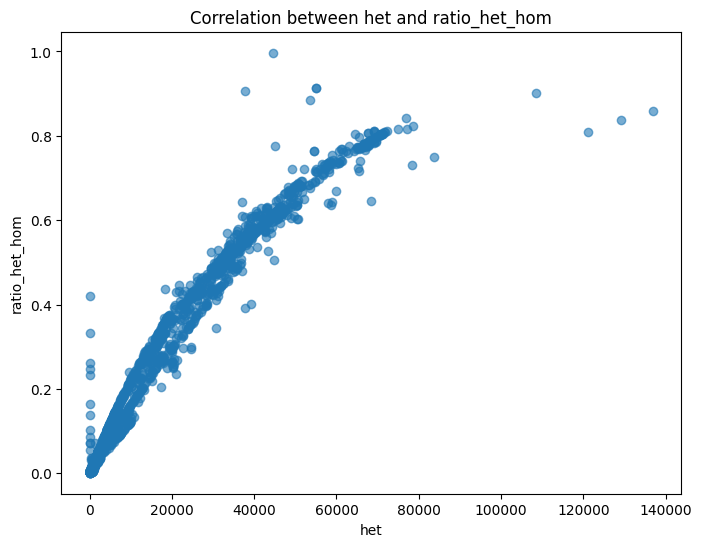

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_correlation(df: pd.DataFrame, x_column: str, y_column: str, save_path: str = None) -> None:
    """
    Plot the correlation between two variables in a pandas DataFrame using a scatter plot.

    Parameters:
        df (pd.DataFrame): Input DataFrame.
        x_column (str): Name of the column for the x-axis.
        y_column (str): Name of the column for the y-axis.
        save_path (str, optional): Path to save the plot image. Defaults to None.

    Returns:
        None
    """
    # Plot scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(df[x_column], df[y_column], alpha=0.6)
    
    # Set plot labels and title
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'Correlation between {x_column} and {y_column}')
    
    # Save the plot if save_path is provided
    if save_path:
        plt.savefig(save_path)
        
    # Show plot
    plt.show()

plot_correlation(df, 'het', 'ratio_het_hom', save_path='correlation_het_ratio.png')
